1. [API Gateway](#API-Gateway)
2. [Multiple ways to invoke the Lambda function](#Multiple-ways-to-invoke-the-Lambda-function)
3. [API Gateway - Integration at High Level](#API-Gateway---Integration-at-High-Level)
4. [Example: API Gateway with Kinesis Data Streams](#Example:-API-Gateway-with-Kinesis-Data-Streams)
5. [API Gateway - Endpoint Types](#API-Gateway---Endpoint-Types)
6. [API Gateway - Security](#API-Gateway---Security)
7. [API Gateway - API Types](#API-Gateway---API-Types)
8. [Hands On - Create an API on AWS API Gateway](#Hands-On---Create-an-API-on-AWS-API-Gateway)
9. [Methods in API Gateway](#Methods-in-API-Gateway)
10. [Hands On - Create an Method on AWS API Gateway](#Hands-On---Create-an-Method-on-AWS-API-Gateway)
11. [Check the Method created on API Gateway](#Check-the-Method-created-on-API-Gateway)
12. [Request Sent by API Gateway to AWS Lambda function](#Request-Sent-by-API-Gateway-to-AWS-Lambda-function)
13. [Resource in API Gateway](#Resource-in-API-Gateway)
14. [Hands On - API Gateway Create a Resource](#Hands-On---API-Gateway-Create-a-Resource)
15. [API Gateway - Create Web browser URL based Access](#API-Gateway---Create-Web-browser-URL-based-Access)
16. [Hands On - Deploy API from API Gateway](#Hands-On---Deploy-API-from-API-Gateway)
17. [API Gateway Stages and Deployment](#API-Gateway-Stages-and-Deployment)
18. [API Gateway - Stage Variables](#API-Gateway---Stage-Variables)
19. [API Gateway Stage Variables and Lambda Alias](#API-Gateway-Stage-Variables-and-Lambda-Alias)
20. [Hands On - API Gateway Stage Variables](#Hands-On---API-Gateway-Stage-Variables)
21. [Deploying Different stages - API Gateway](#Deploying-Different-stages---API-Gateway)
22. [Setup Stage Variables inside the DEV/TEST/PROD Stage of API Gateway for a resource](#Setup-Stage-Variables-inside-the-DEV/TEST/PROD-Stage-of-API-Gateway-for-a-resource)
23. [Check the configuration option for stage](#Check-the-configuration-option-for-stage)
24. [API Gateway - Canary Deployments](#API-Gateway---Canary-Deployments)
25. [Hands On - Canary Deployment API Gateway](#Hands-On---Canary-Deployment-API-Gateway)
26. [API Gateway - Integration Types](#API-Gateway---Integration-Types)
27. [Mapping Templates - AWS & HTTP Integration](#Mapping-Templates---AWS-&-HTTP-Integration)
28. [Mapping Template Example: JSON to XML with SOAP](#copy-ami-to-another-region)
29. [Mapping Templates - Query String Parameters](#copy-ami-to-another-region)
30. [Hands On - Mapping Templates](#Hands-On---Mapping-Templates)
31. [API Gateway - OPEN API](#API-Gateway---OPEN-API)
32. [OpenAPI - Request Validation](#OpenAPI---Request-Validation)
33. [Hands On - OpenAPI API Gateway](#Hands-On---OpenAPI-API-Gateway)
34. [API Gateway - Caching](#API-Gateway---Caching)
35. [API Gateway - Cache Invalidate](#API-Gateway---Cache-Invalidate)
36. [Hands On - API cache Invalidation at Stage Level](#Hands-On---API-cache-Invalidation-at-Stage-Level)
37. [Hands On - API cache Invalidation at Method Level](#Hands-On---API-cache-Invalidation-at-Method-Level)
38. [API Gateway Usage Plans and API Keys](#API-Gateway-Usage-Plans-and-API-Keys)
39. [API Gateway - Monitoring, Logging, Tracing](#API-Gateway---Monitoring,-Logging,-Tracing)
40. [API Gateway - CloudWatch Metrics](#API-Gateway---CloudWatch-Metrics)
41. [API Gateway Throttling & Errors](#API-Gateway-Throttling-&-Errors)
42. [API Gateway CORS](#API-Gateway-CORS)
43. [API Gateway Authorization & Authentication](#API-Gateway-Authorization-&-Authentication)
44. [Hands On - API Gateway Authentication & Authorization](#Hands-On---API-Gateway-Authentication-&-Authorization)
44. [API Gateway REST vs HTTP API](#API-Gateway-REST-vs-HTTP-API)
45. [API Gateway - WebSocket API: (Persistent connection)](#API-Gateway---WebSocket-API:-(Persistent-connection))
46. [WebSocket Connection-URL-Operations](#WebSocket-Connection-URL-Operations)
47. [API Gateway - WebSocket API Routing](#API-Gateway---WebSocket-API-Routing)
48. [API Gateway - Architecture](#API-Gateway---Architecture)


## API Gateway:
- Its a serverless API
- API Gateway + Lambda => no infrastructure to manage
- Supports Web Socket Protocol
- Handle API versioning
- Handles security (authentication and authorization)
- Handle different environment
- Create API keys, handle request throttling, 
- Swagger/Open API import to quickly define APIs
- Transform and Validate requests and responses
- Generate SDK and API specifications
- Cache API responses

#### Multiple ways to invoke the Lambda function:
- Client can directly invoke the Lambda function using Function URL which is then connected to DynamoDB with proper IAM permissions
- The client can use the Application Load Balancer's HTTP/HTTPS endpoint to invoke the Lambda function
- The client can also use API gateway to invoke the Lambda function

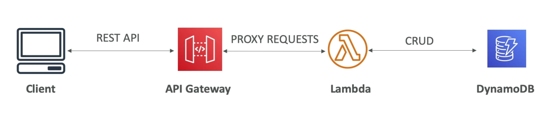

In [23]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/api.jpeg')
new_image = img.resize((550, 120))
display(new_image)

##### The Above Process:

- The client will use REST APIs to communicate with API Gateway
- The API Gateway will then proxy the request to AWS Lambda function which will then invoke the Lambda function and perform CRUD operation

#### API Gateway - Integration at High Level:

Lambda function:
- Invoke Lambda function
- Easy way to expose REST APIs backed by AWS Lambda

HTTP:
- Expose any HTTP endpoints in the backend
- Example: internal HTTP API on premises, Application Load Balancer
- Why? to leverage API Keys, rate limiting, user authentications, caching, etc,.

AWS Service:
- Expose any AWS API through API Gateway
- Example: start a Step Function workflow, post a message to SQS
- Why? to add authentication, deploy APIs publicly, rate control

#### Example: API Gateway with Kinesis Data Streams:

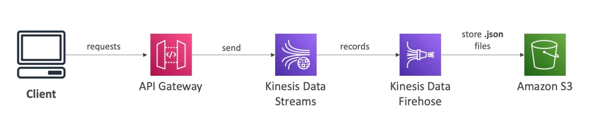

In [24]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/kinesis.jpeg')
new_image = img.resize((590, 120))
display(new_image)

#### API Gateway - Endpoint Types:

Edge Optimized (default): 
- for global clients (accessed by anyone around the world)
- Request are routed via CloudFront Edge locations (improves latency)
- API Gateway still lives only in 1 region

Regional: 
- regional clients (accessed by clients within the same region)
- Could combine with CloudFront (more control over caching strategies and distribution)

Private: 
- Accessed within the VPC using an interface VPC endpoint (ENI)
- Resource Policy to define access


#### API Gateway - Security:
- User authentication
    - IAM Roles (internal applications)
    - Cognito (external mobile users)
    - Custom Authorizer (write own logic)

- HTTPS Security:
    - Custom Domain Name HTTPS Security via integration with AWS Certificate Manager
    - If using Edge Optimized endpoint, then certificate must be in us-east-1
    - If using Regional endpoint, then certificate must be in same region as API Gateway
    - Must setup CNAME or A-alias record in Route53 to point the domain and API Gateway


##### API Gateway - API Types:

- API Types:

    - HTTP API:
        - works with Lambda, HTTP backends
        - low latency and cost effective REST APIs with built in features like OIDC, OAuth2 and CORS.
    
    - REST API:
        - works with Lambda, HTTP backends, AWS Services
        - Build REST APIs with complete control of request and response and also API management capabilities
    
    - WebSocket API:
        - works with Lambda, HTTP backends, AWS Services
        - Build WebSocket API using persistent connections for real-time use cases like chat applications and dashboard
    
    - REST API (Private):
        - works with Lambda, HTTP backends, AWS Services
        - REST API only accessible within the VPC

##### Hands On - Create an API on AWS API Gateway:
- Go to API Gateway console
    - API Types
        - REST API
            - API Details
                - New API
                - Clone Existing API
                - Import API (from Open API definition)
                - Example API
            - Name
            - API Endpoint type
                - Regional
                - Edge Optimized
                - Private
        - Create

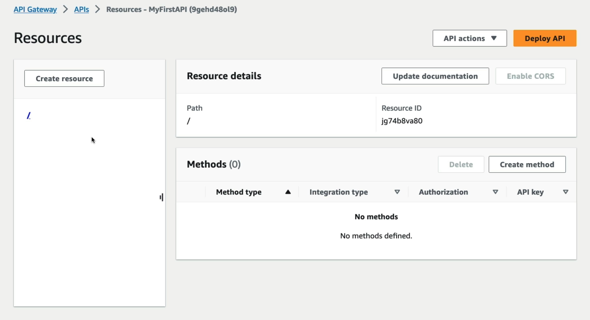

In [25]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/firstapi.jpeg')
new_image = img.resize((590, 320))
display(new_image)

#### Methods in API Gateway:
- While creating a method in API Gateway, we associate it AWS Lambda, AWS Service, HTTP, VPC

##### Hands On - Create an Method on AWS API Gateway:
- Go to API Gateway console
- Go inside the API created on API Gateway
    - Click on create method option (right-side)
        - Method type
            - GET *
            - ANY
            - DELETE
            - HEAD
            - OPTIONS
            - PATCH
            - PUT
            - POST
        - Integration Type
            - Lambda function *
                - Add the Lambda function ARN
            - HTTP
            - Mock
            - AWS service
                - Region (drop-down)
                - Service (drop-down)
                - Sub-domain
                - HTTP Method
            - VPC Link
        - Timeout
            - Default 29 seconds
            - Modifiable
    - Create

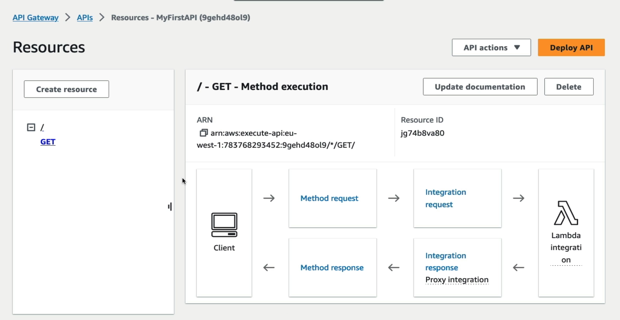

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/method1.jpeg')
new_image = img.resize((620, 320))
display(new_image)

#### Check the Method created on API Gateway:
- Go to API gateway console
    - Go into the API created
        - Go into the Method created
            - Get Method execution

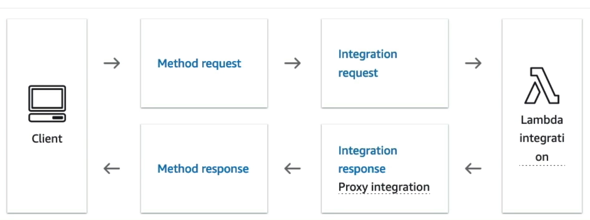

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/method.jpeg')
new_image = img.resize((590, 220))
display(new_image)

- Method Request
    - Authorization
    - API Keys Required
    - Request Validator
    - SDK Operation Name
    - Request Path
    - URL query string parameters

- Integration Request
    - Integration type
        - Lambda
    - Region
    - Lambda Proxy Integration
    - Lambda function
    - Timeout
        - 29 secs
    - URL path parameters

- Integration Response
    - Proxy Integration

- Method Response
    - Response Header
    - Response Body

##### Request Sent by API Gateway to AWS Lambda function:

Some of them are:
- Resource
- Headers
- Path
- HTTP Method
- Multi Value Headers
- Query String parameters
- Multi Value Query String parameters
- Account Id
- API Key
- User Agent
- User ARN
- Domain Name
- etc

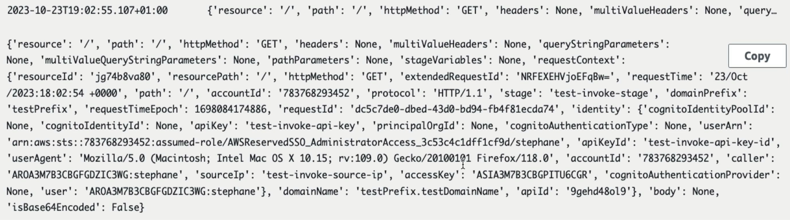

In [28]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/request.jpeg')
new_image = img.resize((790, 220))
display(new_image)

#### Resource in API Gateway:
- Similarly like different APIs for different pages in website
    - www.amazon.com/ => Homepage Resource 
    - www.amazon.com/sales => Sales Page Resource
    - www.amazon.com/about => About Page Resource

Note:
- Each Resource can have a API Method associated with it


##### Hands On - API Gateway Create a Resource:
- Go to API gateway console
    - Go into the API created
        - Go into the Method created
            - Create Resource
                - Resource Path
                - Resource Name
                - Enable CORS (Cross Origin Resource Sharing)
                    - Create OPTIONS method that allows all origins, all methods, and several common headers
                - Create


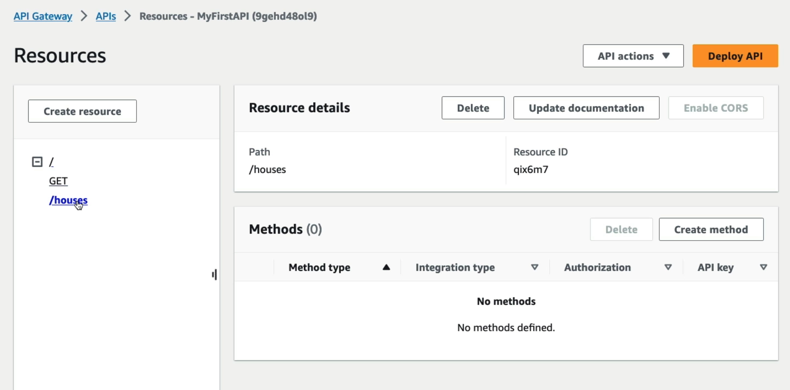

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/houses.jpeg')
new_image = img.resize((790, 390))
display(new_image)

Note:
- Similarly, we can create a method for "/houses" resource

#### API Gateway - Create Web browser URL based Access:
- After creating the resources and their related methods
- We deploy the API

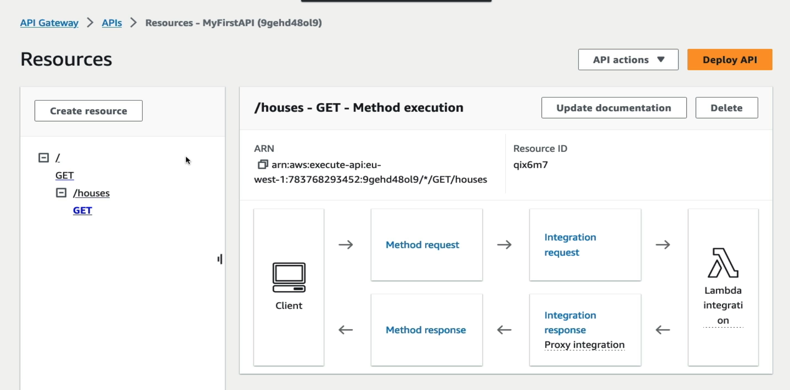

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/complete.jpeg')
new_image = img.resize((790, 390))
display(new_image)

##### Hands On - Deploy API from API Gateway:
- Go to API Gateway console
    - Go to the API created
        - Check to the resources and it methods
        - Deploy API option (top-right side)
            - Stage
            - Name
            - description
            - Deploy


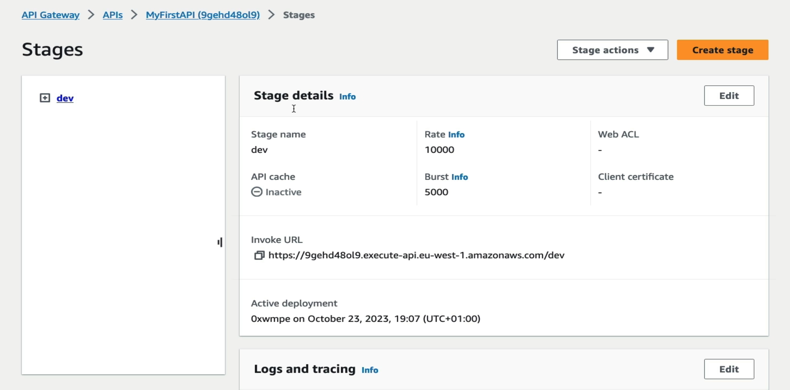

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/deploy1.jpeg')
new_image = img.resize((790, 390))
display(new_image)

##### From the Above Image:
- Invoke URL field give the web browser based url

#### API Gateway Stages and Deployment:

Note:
- Making changes in API Gateway are not effective until they are deployed
- Changes are deployed to Stages
- Each Stage has it own configuration parameters
- Stages can be rolled back (history of deployment is kept)


##### API Gateway - v1 & v2 stages:

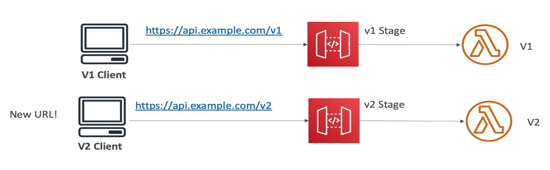

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/vstages.jpeg')
new_image = img.resize((550, 170))
display(new_image)

##### API Gateway - Stage Variables:
- They are similar to environment variables but for API Gateway
- Used for often changing configuration values
- Used in:
    - Lambda ARN
    - HTTP Endpoint
    - Parameter mapping templates
- Use case:
    - Configure HTTP endpoints your stages talk to (dev,test,prod)
    - Pass configuration parameters to Lambda through mapping templates
- Stage Variables are passed to Lambda function via "context" Object
- Format: ${stageVariables.variableName}

##### API Gateway Stage Variables and Lambda Alias:
- We create Stage Variables to invoke the correct Lambda function via Alias
- Refer the below image for example

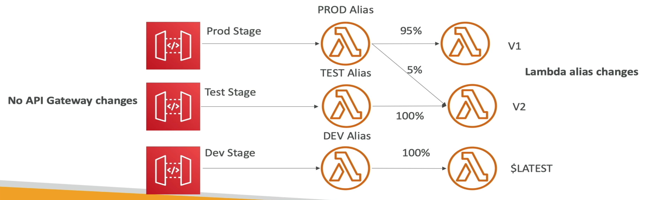

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/alias.jpeg')
new_image = img.resize((650, 200))
display(new_image)

##### Hands On - API Gateway Stage Variables:
- Go to API Gateway console
    - Go to the API created
        - Create a resource for stage variables
        - Ensure to Lambda function with several versions
            - Publish Each Version of Lambda function
                - The Dev version is not published and associated with $LATEST
            - Alias Each Version of Lambda Function
            - Copy the Lambda function ARN
        - Create Method
            - Method Type
            - Integration Type
                - Lambda
            - Lambda ARN
                - Paste the copied Lambda ARN + ":$(stageVariable.lambdaAlias)"
                - Once the previous step is performed it provides an IAM command to run in order add the necessary permissions to Lambda Function


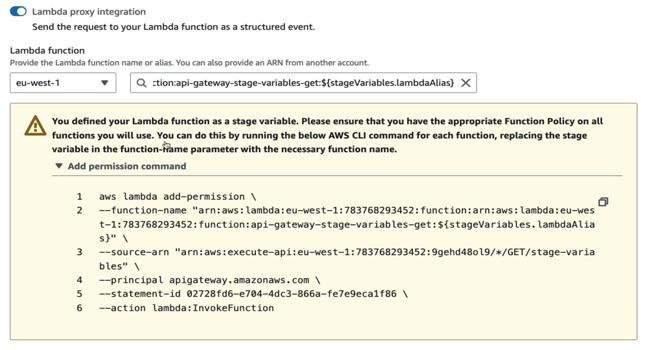

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables.jpeg')
new_image = img.resize((650, 350))
display(new_image)

Note:
- the provided IAM command needs to be rectified since the Lambda ARN is mentioned twice
- The IAM command is run three times for 3 Versions of Lambda function (PROD,DEV,TEST) by replacing the "${stageVariable.lambdaAlias} by DEV, PROD, TEST as shown in the below image

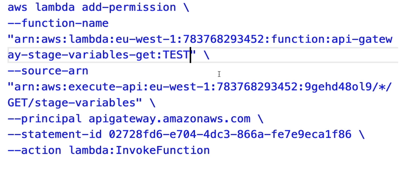

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables1.jpeg')
new_image = img.resize((400, 180))
display(new_image)

- Ensure to run the IAM command has been executed number of times before the creating the method is performed

##### Deploying Different stages - API Gateway:

- We can Deploy API in API Gateway for different stages
    - DEV
    - TEST
    - PROD

- Each of the API Gateway stages will have their own Stage Variables as shown below

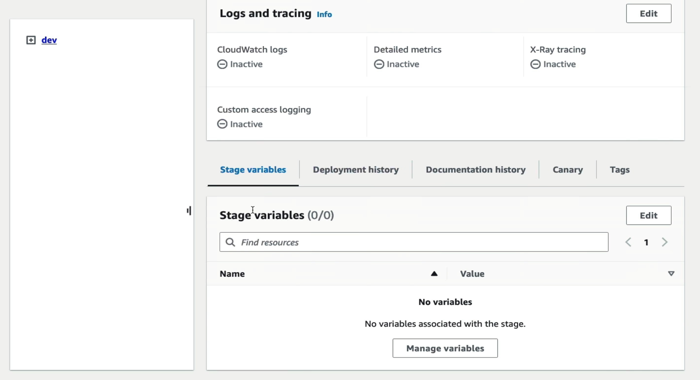

In [36]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables2.jpeg')
new_image = img.resize((700, 380))
display(new_image)

##### Setup Stage Variables inside the DEV/TEST/PROD Stage of API Gateway for a resource:
- Go to API Gateway console
- Go to Stages option (left-side)
    - Select the stage you want to configure (DEV/TEST/PROD)
        - Go to Stage Variables
            - Edit
                - Name
                - Value

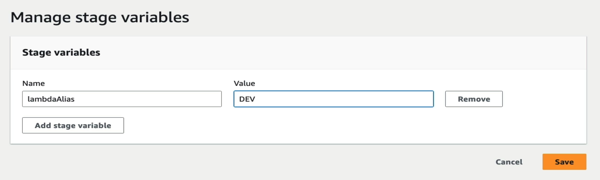

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/stageVariables3.jpeg')
new_image = img.resize((600, 180))
display(new_image)

#### Check the configuration option for stage:
- Go to API Gateway console
- Go to Stages option (left-side)
    - Select the stage you want to check
        - Go to Stage Details
            - Edit
                - Name
                - Additional Settings
                    - API cache
                        - cache capacity
                        - encrypt cache
                        - cache TTL
                        - Per Key cache invalidation
                            - requires authorization
                    - Throttling Settings
                        - Rate (no. requests per second)
                        - Burst (concurrent requests)
                    - Firewall and Certificate Settings
                        - AWS WAF (Web Application Firewall)
                        - Client Certificate (to check if the request is from API Gateway)
        - Go to Logging & Tracing
            - Edit
                - CloudWatch Logs
                    - errors only
                    - errors and info logs
                    - full request and response logs
                - Detailed Metrics
                - Custom Access Logging
                    - Access Log destination
                - X-Ray tracing
        - Stage Variables
        - Canary
        - Documentation History
        - Deployment History
        - Tags

#### API Gateway - Canary Deployments:
- Possibility to enable canary deployments for any stage
- Choose the % of traffic the canary channel receives
- Metrics and Logs are separate (better for monitoring)
- Possibility to override stage variables for Canary
- This is Blue/Green deployment with AWS Lambda and API Gateway

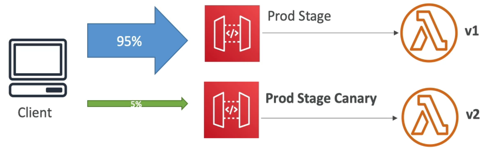

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/canary.jpeg')
new_image = img.resize((500, 150))
display(new_image)

##### Hands On - Canary Deployment API Gateway:
- Go to API Gateway console
    - Go into the created API
        - Go to Resources option
            - Create a Resource (Canary)
                - Create a Method
                    - Lambda (Created already two versions of Lambda function - PROD/TEST)
                        - Lambda ARN (Paste the ARN of Lambda function + ":1" version value i.e. 1/2/3)
                - Test the Method
                - Deploy API (with Resource & Method) Stage - Canary
                - Canary
                    - Create
                        - Distribution
                            - Canary stage
                                - eg: 50%
                            - Current stage
                                - eg: 50%
                        - Stage cache
                        - Canary Stage Variable
                            - available only if stage variable if set for Canary stage
            - Go to Resources 
                - Go in to created resource for canary
                    - Go into the method
                        - Go to integration request
                            - Edit
                                - Change Lambda ARN 
                                    - Lambda ARN + ":2" => 2 is the Lambda version value
                                - Execution Role
                                - Credential cache
                - Deploy API (Stage - Canary)

Note:
- Load the URL to check canary deployment working (sometime the change don't show in Canary tab)

##### To promote the canary changes:
- Go to Canary tab, Click on Promote Canary to update the URL to reflect only Lambda version V2

#### API Gateway - Integration Types:

MOCK:
- can return a response without sending an actual request to the backend

HTTP / AWS (Lambda & AWS Services):
- must configure method request/response, integration request/response
- can setup data mappings using mapping templates to make changes to the response/request

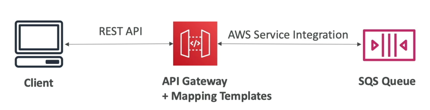

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/integration.jpeg')
new_image = img.resize((430, 110))
display(new_image)

AWS_Proxy:
- incoming request from client sent as input to Lambda
- the request cannot be modified therefore no mapping template and the headers, query string parameters are directly sent as parameters
- The Lambda function is responsible for the logic of the request/response

Note:
- The below image shows all the logic involved around client's request/response is in Lambda function

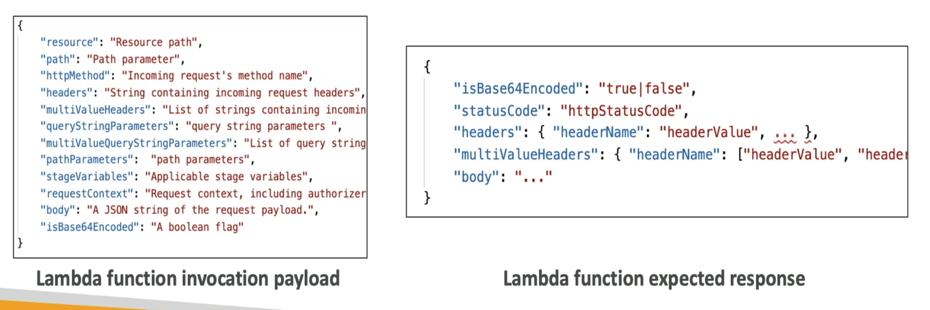

In [40]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/awsproxy.jpeg')
new_image = img.resize((930, 310))
display(new_image)

HTTP Proxy:
- No mapping template
- The client request is directly to backend via API Gateway
- Similarly, the HTTP response from backend is forwarded by API Gateway
- Possibility to add HTTP Headers (eg: API Keys)

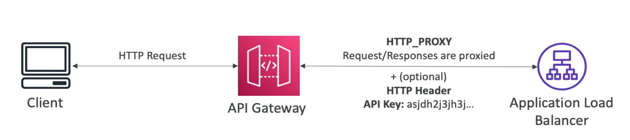

In [41]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/httpproxy.jpeg')
new_image = img.resize((630, 140))
display(new_image)

##### Mapping Templates - AWS & HTTP Integration:
- Mapping templates are used to modify request/response 
- Rename/Modify query string parameters
- Modify body content
- Add Headers
- Uses Velocity Template Language (VTL) for Loops, if-else statements, etc
- Filter output results (remove unnecessary data)
- Content Type can be set to "application/xml" or "application/json"

##### Mapping Template Example: JSON to XML with SOAP
- SOAP APIs are xml based and REST APIs are JSON based

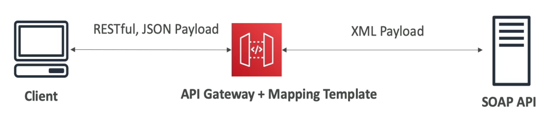

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/soap.jpeg')
new_image = img.resize((550, 120))
display(new_image)

The Above Process:
- The Client sends a JSON request via REST API to API Gateway
- The API Gateway with the help of mapping templates modifies the request to form SOAP Request for SOAP API service
- The SOAP API Service provides the response for the request as SOAP response
- The SOAP response is again modified to JSON based response for the client to receive

##### Mapping Templates - Query String Parameters:

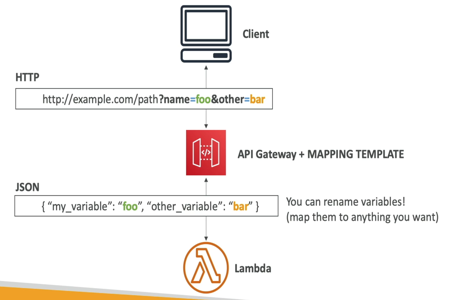

In [43]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/querystring.jpeg')
new_image = img.resize((450, 300))
display(new_image)

The Above Process:
- The client send a HTTP request with query string parameter values to the API Gateway Service which uses Mapping Templates feature
- The API Gateway then modifies the query string parameter using mapping templates to rename the query string parameter variable names from "name" & "other" to "my_variable" & "other_variable"
- The modified request is then sent to the Lambda function

##### Hands On - Mapping Templates:
- Go to API Gateway console
    - Create a resource "mapping"
        - Create a Method
            - Lambda
                - Create a Lambda function
                    - Test the Lambda function (output => {"example": "Hello Lambda"})
                - Select the Lambda ARN
        - Go into the created method
            - Go into Integration Response
                - Mapping Template
                    - Create a template
                        - content type
                        - generate template
                        - template body
                        

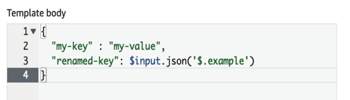

In [44]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/templatebody.jpeg')
new_image = img.resize((350, 100))
display(new_image)

The Above Template Body explained:
- "my-key": "my-value" (default written for understanding purpose)
- Then followed by the response sent by the Lambda function (Key-Value)
- The key from Lambda is replaced from "example" to "renamed-key"
- The $input defines the response received from the Lambda function

#### API Gateway - OPEN API:
- Common way to define REST API, using API definition as code
- Import existing OpenAPI 3.0
    - Method
    - Method Request
    - Integration Request
    - Method Response
    - +AWS extensions for API Gateway and setup every single option
- OpenAPI specs can be written in YAML or JSON
- Can export the current API as OpenAPI spec
- Using OpenAPI we can generate SDK for our applications


##### OpenAPI - Request Validation:
- Performs basic request validations before proceeding to integration request
- When validation fails, returns 400 error response to caller
- Checks: 
    - if all the required request parameters in URI, query string, headers are included and not blank
    - request payload to adhere the JSON schema request model
- This reduces unnecessary calls to backend

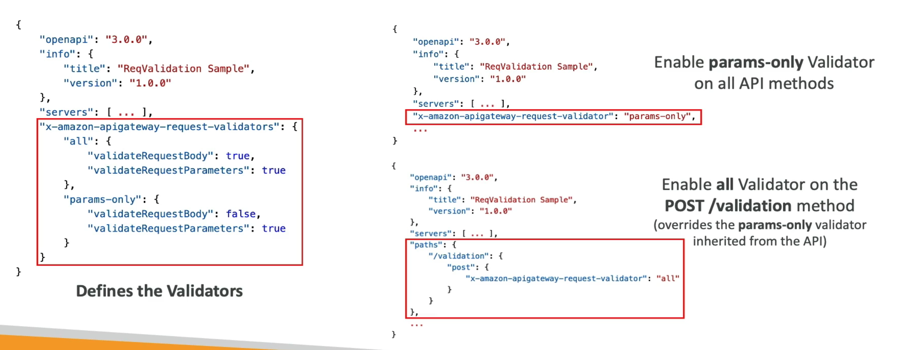

In [45]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/openapi.jpeg')
new_image = img.resize((900, 350))
display(new_image)

##### Hands On - OpenAPI API Gateway:
- Go to API Gateway console
    - Create API or Go to API option (left-side top)
        - Import API
        - Example API (provides the template for the API definition to be written to create one via OpenAPI API definition)

##### To Export the created API:
- Go to the API created
    - Go to any one of the stages needed from stage option
        - Go to Stage Actions
            - Export
                - API specification type
                    - Swagger
                    - OpenAPI 3.0
                - Format
                    - JSON
                    - YAML
                - Extensions
                    - Without extensions
                    - With API Gateway extensions
                    - With Postman extensions

##### Generate SDK for API:
- Go to the API created
    - Go to any one of the stages needed from stage option
        - Go to Stage Actions
            - Generate SDK (many programming languages supported)

#### API Gateway - Caching:
- Used to reduce the number of calls to the API
- Possible to override cache setting for each method
- Caching is defined at stage level
- TTL: 300 seconds (default) min: 0 sec, max: 3600 sec
- Cache is encrypted
- cache capacity is between 0.5 GB to 237 GB
- Caching is expensive and used mostly in production

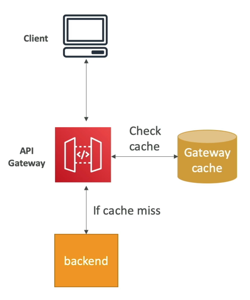

In [46]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/caching.jpeg')
new_image = img.resize((250, 300))
display(new_image)

##### API Gateway - Cache Invalidate:
- ability to flush the entire cache immediately
- clients can invalidate cache
    - header: Cache-control:max-age=0 (if proper IAM permissions are granted)
- If we do not specify the API cache invalidation policy or check the required authorization option, then any client can perform API cache invalidation

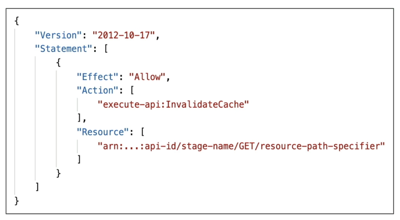

In [47]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/iam.jpeg')
new_image = img.resize((400, 220))
display(new_image)

##### Hands On - API cache Invalidation at Stage Level:
- Go to API Gateway console
- Go to API option (left-side)
    - Go to Stage option
        - Choose any stage
            - Edit Stage details
                - Enable API Cache
                    - Cache capacity
                    - Encrypt cache data
                    - Cache TTL
                    - Per Key Cache Invalidation (based on specific key value, we can invalidate certain parts of the API cache)
                        - Require Authorization
                            - Unauthorized request handling
                                - Ignore cache control header
                                - Ignore cache control header and add a warning message in response header
                                - Fail the request with a 403 Unauthorized response


##### Hands On - API cache Invalidation at Method Level:
- Go to API Gateway console
- Go to API option (left-side)
    - Go to Stage option
        - Choose any stage
            - Choose any Resource and its method
                - Edit Method
                    - Enable Method Cache 
                        - Encrypt cache data
                        - Cache TTL
                        - Per Key Cache Invalidation (based on specific key value, we can invalidate certain parts of the API cache)
                            - Require Authorization
                                - Unauthorized request handling
                                    - Ignore cache control header
                                    - Ignore cache control header and add a warning message in response header
                                    - Fail the request with a 403 Unauthorized response


#### API Gateway Usage Plans and API Keys:

Usage Plans:
- who can access one or more deployed API stages and methods
- how much and how fast they can access them
- uses API keys to identify API clients and meter access
- configure throttling limits and quotas that are enforced on individual clients

API Keys:
- alphanumeric string value
- can be used with usage plans to control access 
- throttling limits are applied to API Keys
- Quotas limit is the overall number of maximum requests

Correct Order for API Keys and Usage Plan:
- Create one or more APIs, its resources, methods and deploy it to stages
- Generate or Import the API Keys which is used the client/user to access the API
- Create usage plan with desired throttling and quota limits
- Associate API Keys and API stages with usage plans

Note:
- Callers of the API must provide the API keys in "x-api-key" header

#### API Gateway - Monitoring, Logging, Tracing:

CloudWatch Logs:
- contains information about the request/response body
- Enable Cloudwatch logging at stage level (Log Level - ERROR, DEBUG, INFO)
- override settings as per API basis


X-Ray:
- Enable tracing to get extra information about requests in API Gateway
- X-Ray API Gateway + Lambda gives us the full picture

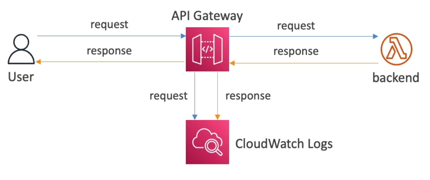

In [26]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/log.jpeg')
new_image = img.resize((430, 180))
display(new_image)

##### API Gateway - CloudWatch Metrics:
- Metrics are at stage level, possible to create detailed metrics
- Latency: the total elapsed time from the client sending the request to the client receiving the request
    - Integration Latency + Other API Gateway Latency such as mapping templates, authorization, etc
- Integration Latency: the elapsed time from the request send from API Gateway to the response received by API Gateway
- Count: the number of request sent in a given period of time
- CacheHitCount & CacheMissCount:
    - CacheHit count will be high if the efficiency of the API cache is good
- Errors: 4XX (client side) & 5XX (server side)


##### API Gateway Throttling & Errors:

Account Limit:
- 10,000 requests per second for all APIs, beyond will result in throttling
    - soft limit and can be increased based no request
- If throttled => 429 Too many requests (re-triable)
- can set stage limit and method limit to improve performance or define usage plan to throttle per customer
- API Gateway throttling similar to Lambda concurrency issue

API Gateway Errors:
- 4XX: (client side)
    - 400 (Bad request)
    - 403 (Access Denied, WAF firewall filter)
    - 429 (Too may request - throttling)

- 5XX: (server side)
    - 502 (Bad Gateway Exception - from Lambda proxy Integration)
    - 503 (Service Unavailable)
    - 504 (Integration failure)
        - Eg: timeout exception

##### API Gateway CORS:
- CORS on API Gateway must be enabled if we performing a cross domain request (via API Gateway console)
- The OPTIONS pre-flight request must contain the following headers:
    - Access-Control-Allow-Methods
    - Access-Control-Allow-Headers
    - Access-Control-Allow-Origin

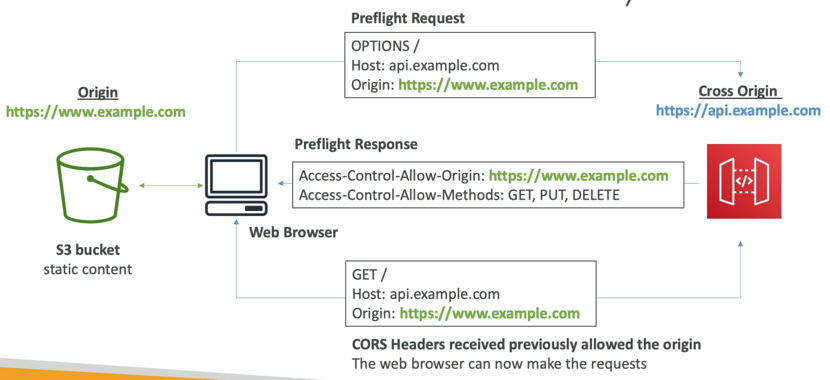

In [27]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cors.jpeg')
new_image = img.resize((830, 380))
display(new_image)

#### API Gateway Authorization & Authentication:

IAM Permissions:
- IAM User/Group/Role = Authentication ; IAM Policy = Authorization
    - good when used with the AWS services
- Client send a REST API request with Sigv4 signed IAM credentials to API gateway in the headers
- API Gateway verifies the signature and the IAM Policy for permissions and then calls the backend service


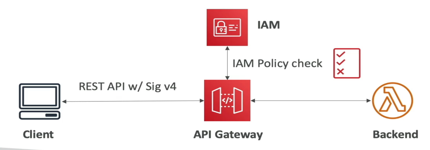

In [28]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/IAMpermissions.jpeg')
new_image = img.resize((430, 150))
display(new_image)

Resource Policy: (can be combined with IAM permissions)
- Similar Lambda Resource Policy
- Allows for cross account access (combined with IAM security)
- Allows specific source IP address
- Allows VPC endpoints

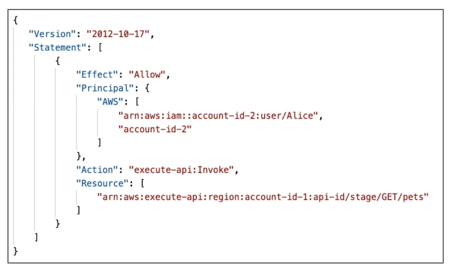

In [29]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/resourcepolicy.jpeg')
new_image = img.resize((450, 270))
display(new_image)

Cognito User Pools: (database of user at high level)
- Cognito fully manages the user lifecycle, token expires automatically
- API Gateway verifies identity automatically from AWS Cognito
- No custom implementation required
- Authentication = Cognito ; Authorization = API Gateway Methods

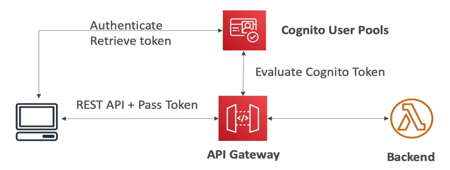

In [30]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/cognito.jpeg')
new_image = img.resize((450, 170))
display(new_image)

Lambda Authorizer: (formerly custom authorizer)
- Token based authorizer (bearer token), eg: JWT, OAuth
- When we pass a parameter-based Lambda authorizer request, we can include headers, query strings, stage var in the request
- Lambda must return an IAM policy for the user that made the request and the result policy is cached
- Authentication: External ; Authorization: Lambda Function

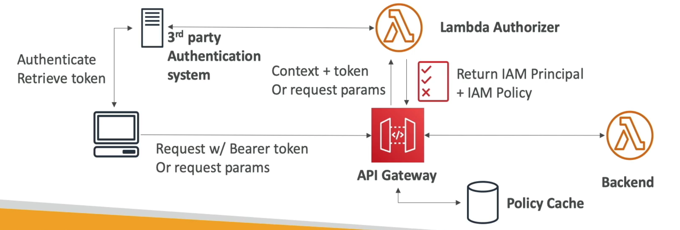

In [31]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/lambdaauthorizer.jpeg')
new_image = img.resize((680, 230))
display(new_image)

The Above process explained:
- The client first send a request to 3rd Party Authentication System to retrieves the JWT/OAuth token, etc
- Then, the retrieved token is sent as a request with the headers or request parameters to API Gateway
- The API Gateway invokes the Lambda Authorizer (Lambda function), the function will have custom code to communicate with the external 3rd party Authentication App and verify the token
- Once the token is verified successfully, then the AWS Lambda Authorizer creates IAM Principal and IAM Policy document
- Now the API Gateway with the IAM permissions will be store at the Policy Cache (for frequent access)
- Finally, the API Gateway has the necessary permission to invoke the destination lambda function

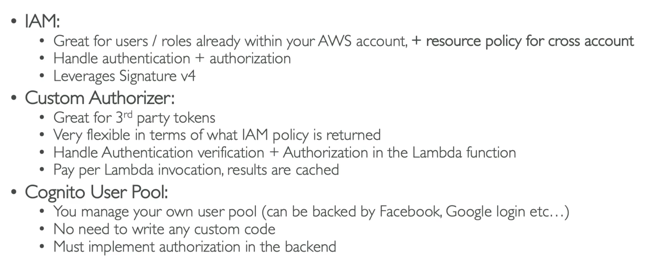

In [32]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/summary.jpeg')
new_image = img.resize((650, 270))
display(new_image)

##### Hands On - API Gateway Authentication & Authorization:
- Go to API Gateway console
    - Go to APIs option (left-side)
        - Go into any one of the created APIs
            - Choose any Resource and its method
                - Go to Method request
                    - Edit
                        - Authorization
                            - AWS_IAM
                        - Request Validator
                        - API Key required checkbox
        - Go to Resource Policy
            - Create Policy
                - Example Policy
                - Template
                    - AWS account allow list
                    - IP Range deny list
                    - Source VPC allow list
        - Go to Authorizer (for custom authorizer - lambda based or cognito)
            - Name
            - Type
                - Lambda
                    - Lambda ARN
                    - Lambda execution Role
                    - Lambda event payload
                        - Token
                        - Request
                        - Token Source (enter header that contains authorization token)
                        - Token validation (regex to validate authorization token)
                        - Authorization Caching
                        - TTL
                - Cognito
                    - Choose Cognito user pool
                    - Token Source (enter header that contains authorization token)
                    - Token validation (regex to validate authorization token)

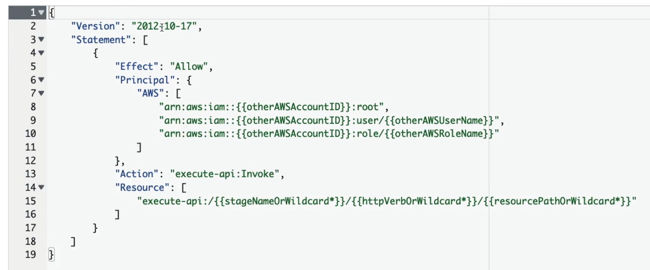

In [33]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/allow_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)

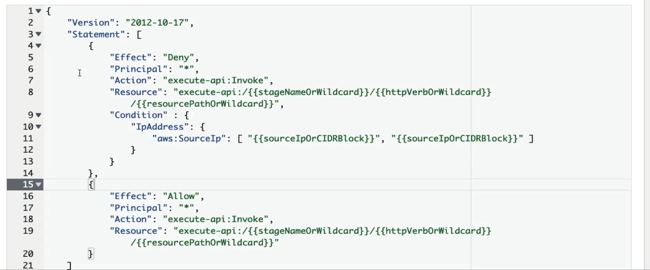

In [6]:
from PIL import Image 
from IPython.display import display

img = Image.open('deny_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)

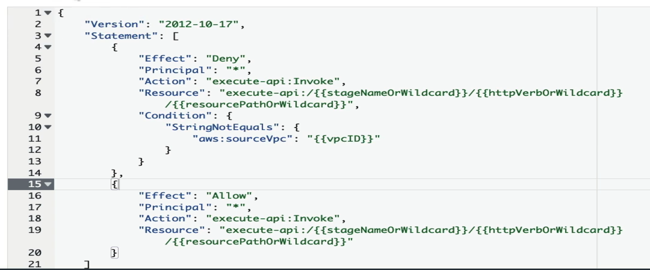

In [34]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/vpc_allow_list.jpeg')
new_image = img.resize((650, 270))
display(new_image)

#### API Gateway REST vs HTTP API:

HTTP API:
- low latency, cost effective AWS Lambda proxy, HTTP proxy APIs and private integration
- supports OIDC and OAuth 2.0 authorization and built in support for CORS
- No usage plans and API keys

REST API:
- All features except Native OpenID Connect/OAuth 2.0

Note:
- HTTP API Cheaper than REST APIs
- Resource based policy is not supported in HTTP API

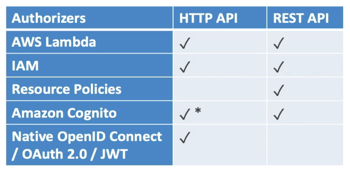

In [35]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/support.jpeg')
new_image = img.resize((350, 170))
display(new_image)

#### API Gateway - WebSocket API: (Persistent connection)
- two-way interactive communication between user's browser and server
- servers can push information to the client
- enables stateful application use case
- WebSocket APIs are often used in real-time applications such as chat applications, collaboration platforms, multi-player games, financial trading platforms
- Works in AWS Services (Lambda, DynamoDB) or HTTP endpoints


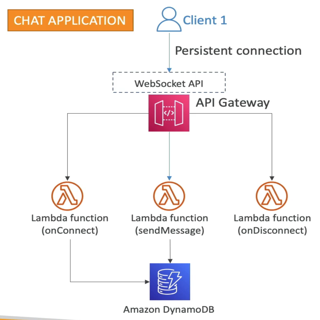

In [36]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/websocket.jpeg')
new_image = img.resize((320, 320))
display(new_image)

The Above Process Explained:
- The user web browser sends the persistent connection request to API Gateway (WebSocket API)
- The API Gateway then forwards the request to invoke the Lambda function (onConnect) which is then forwarded to Amazon DynamoDB to keep the connection persistent and store the connection in DynamoDB
- Once stored, now the API Gateway via users can send the messages into another invoked Lambda function (sendMessage) and retrieve the connection related details and later store the message in DynamoDB
- Once all the messages are processed and stored then the API Gateway invokes another Lambda function to disconnect the WebSocket API connection.

Note:
- Persistent Connection:
    - A persistent connection in APIs is a network connection that remains open for multiple requests and responses, instead of closing after each request. This is also known as an HTTP persistent connection, HTTP keep-alive, or HTTP connection reuse. 


##### Connecting to API:

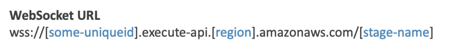

In [37]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url.jpeg')
new_image = img.resize((450, 50))
display(new_image)

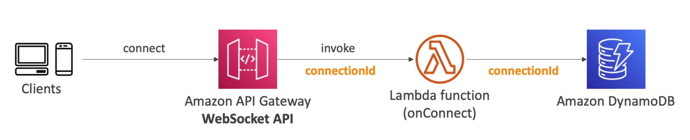

In [46]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb.jpeg')
new_image = img.resize((690, 140))
display(new_image)

- The user web browser sends the persistent connection request to API Gateway (WebSocket API)
- The API Gateway then forwards the request along with connection Id to invoke the Lambda function (onConnect) which is then forwarded to Amazon DynamoDB with the same connection Id to store the persistent connection related details like user,application,etc in DynamoDB

##### Client to Server Messaging: (Connection ID re-used):
Sample websocket URL

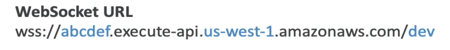

In [38]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url3.jpeg')
new_image = img.resize((450, 50))
display(new_image)

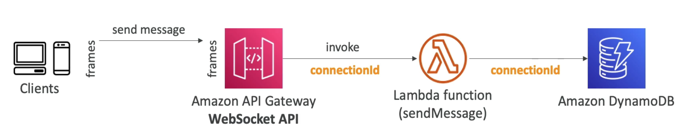

In [39]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb2.jpeg')
new_image = img.resize((690, 140))
display(new_image)

- Once persistent connection is established, now the client via API Gateway (WebSocket API) can send the messages (frames) into another invoked Lambda function (sendMessage) using same connection Id used. 
- Then by using the same connection Id, it retrieves connection related information such as user details from the DynamoDB and perform some operation. 
- After the operation, the messages can be stored in DynamoDB or not

If the client plans to send more message, the message (frames) are sent through the same connection Id (persistent connection)

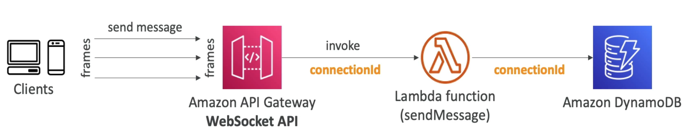

In [40]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiweb3.jpeg')
new_image = img.resize((690, 140))
display(new_image)

##### Server to Client Messaging:
- WebSocket URL + @connections/"connectionId"

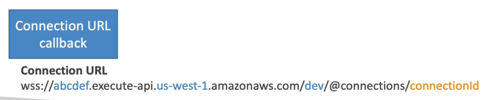

In [41]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/url4.jpeg')
new_image = img.resize((490, 100))
display(new_image)

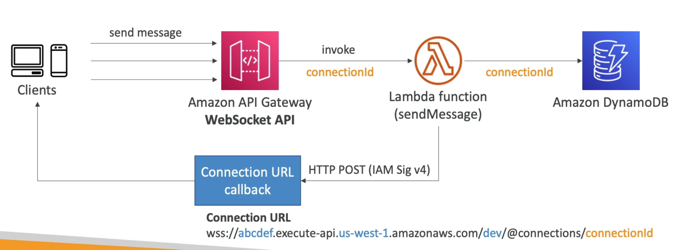

In [42]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/apiwebsocket.jpeg')
new_image = img.resize((690, 250))
display(new_image)

- With WebSocket API, we can enable the Lambda function or any AWS service to send back the HTTP POST request with signed IAM credentials via Sig v4 to the connection URL callback
- Then the connection URL callback in API Gateway will send the message back to client. Thus establishing two-way communication

#### WebSocket Connection URL Operations:

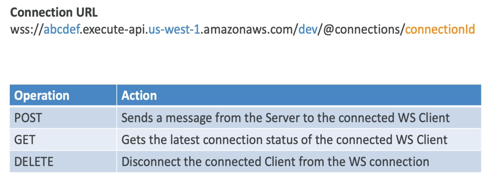

In [43]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/websocketurl.jpeg')
new_image = img.resize((490, 180))
display(new_image)

##### API Gateway - WebSocket API Routing:
- Routing helps the WebSocket API in API Gateway to choose appropriate Lambda function in previous example shown such Lambda (onConnect, sendMessage, etc)
- If no routes are configure then it will take the default route
- Use Route Selection Expression, to select the field on JSON file to perform routing
- Sample Expression: $request.body.action (reference the incoming JSON data file as part of the client request/messages)
- The result from Route Selection Expression is evaluated with route keys available in API Gateway
- If the result matched the route key in API Gateway then the route is then connected to the backend service


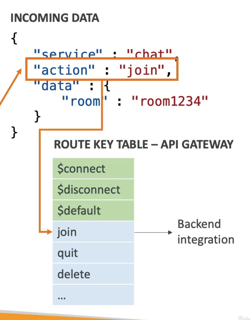

In [45]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/routing.jpeg')
new_image = img.resize((250, 320))
display(new_image)

#### API Gateway - Architecture:
- Create single interface for all the micro-services in the company
- Use API endpoints with various resources
- Apply simple domain name and SSL certificates
- Apply forwarding and transformation rules at API Gateway

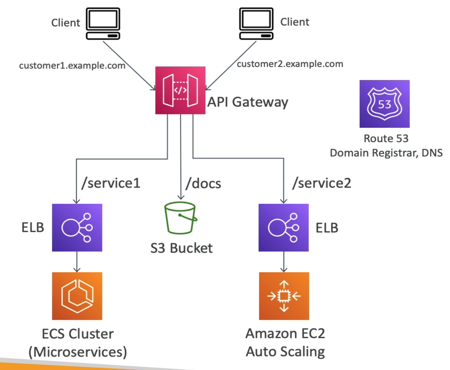

In [44]:
from PIL import Image 
from IPython.display import display

img = Image.open('images/architecture.jpeg')
new_image = img.resize((450, 370))
display(new_image)